In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Suicide Rates per country:**

In [ ]:
suicide_rates = r"C:\Users\PapaYaga\Documents\GitHub\drugs_and_suicide\suicide_rates_2\master.csv"
srates = pd.read_csv(suicide_rates)

In [ ]:
srates_it = srates[srates["country"]=="Italy"]
srates_us = srates[srates["country"]=="United States"]

In [ ]:
srates_us # 1985 - 2015

**Substance abuse Rates per country:**

In [ ]:
substance_rates = r"C:\Users\PapaYaga\Documents\GitHub\drugs_and_suicide\suicide_rates\prevalence_by_mental_and_substa.csv"
sub_rates = pd.read_csv(substance_rates)

In [ ]:
sub_rates_it = sub_rates[sub_rates["entity"]=="Italy"]
sub_rates_us = sub_rates[sub_rates["entity"]=="United States"]

In [ ]:
sub_rates_us # 1990 - 2017

**Self harm Rates per country:**

In [ ]:
self_harm = r"C:\Users\PapaYaga\Documents\GitHub\drugs_and_suicide\self_harm_substance_abuse\world_wide_self_harm_and_substance_deaths.csv"
harm_rates = pd.read_csv(self_harm)

In [ ]:
harm_rates_it = harm_rates[harm_rates["Country"]=="Italy"]
harm_rates_us = harm_rates[harm_rates["Country"]=="United States of America"]

In [ ]:
harm_rates_us # 2017 - 2020

**Alcoholism Rates per country:**

In [ ]:
alcohol_rates = r"C:\Users\PapaYaga\Documents\GitHub\drugs_and_suicide\global_mental_health\share-with-alcohol-and-substance-use-disorders 1990-2016.csv"
alc_rates = pd.read_csv(alcohol_rates)

In [ ]:
alc_rates_it = alc_rates[alc_rates["Entity"]=="Italy"]
alc_rates_us = alc_rates[alc_rates["Entity"]=="United States"]

In [ ]:
alc_rates_us # 1990 - 2016

**Housing prices for Italy and US:**

In [ ]:
housing = r"C:\Users\PapaYaga\Documents\GitHub\drugs_and_suicide\QITR628BIS.csv"
housing_2 = r"C:\Users\PapaYaga\Documents\GitHub\drugs_and_suicide\USSTHPI.csv"

In [ ]:
housing_it = pd.read_csv(housing)
housing_us = pd.read_csv(housing_2)
housing_us.drop(175, inplace=True)

In [ ]:
housing_data = pd.concat([housing_us, housing_it], axis=1)
housing_data.columns = ["DATE","US_housing_price","DATE_none","IT_housing_price"]
housing_data.drop(columns="DATE_none", inplace=True)
housing_data.set_index("DATE", drop=True, inplace=True)

In [ ]:
housing_data["US_housing_price"] = housing_data["US_housing_price"]*472
housing_data["IT_housing_price"] = (housing_data["IT_housing_price"]*228.671)

In [ ]:
housing_data = housing_data.apply(lambda x: round(x, 2))

In [ ]:
sub_rates_us = sub_rates_us.rename(columns = {"year":"Year"})
alc_rates_us.set_index("Year", inplace=True)
sub_rates_it = sub_rates_it.rename(columns = {"year":"Year"})
alc_rates_it.set_index("Year", inplace=True)

In [ ]:
abuse_it = sub_rates_it.join(alc_rates_it, on="Year")
abuse_it.rename(columns={"Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)":"Alcohol abuse (age-standardized percent)"}, inplace=True)
abuse_us = sub_rates_us.join(alc_rates_us, on="Year")
abuse_us.rename(columns={"Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)":"Alcohol abuse (age-standardized percent)"}, inplace=True)

In [518]:
alc_all = alc_rates_it.join(alc_rates_us, on="Year", lsuffix="_italy", rsuffix="_states")

C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year'>

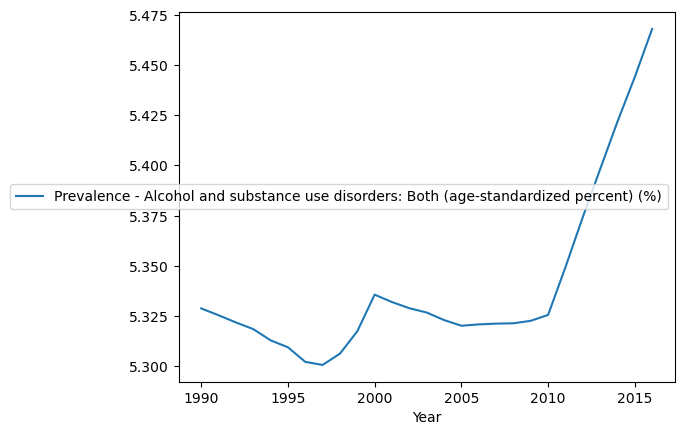

In [524]:
sns.lineplot(alc_rates_us)

C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year'>

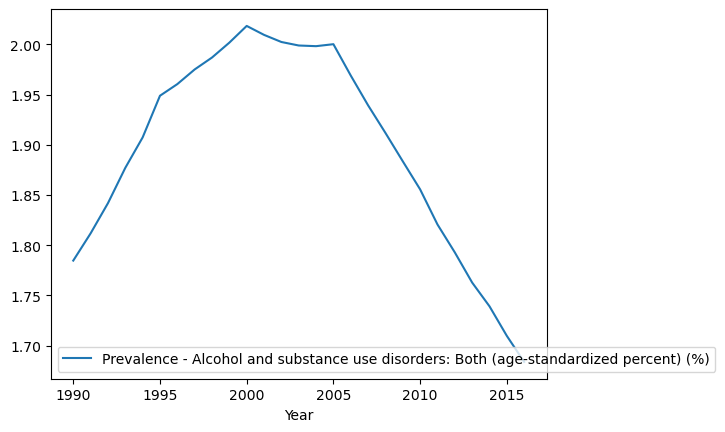

In [525]:
sns.lineplot(alc_rates_it)

C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PapaYaga\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DATE'>

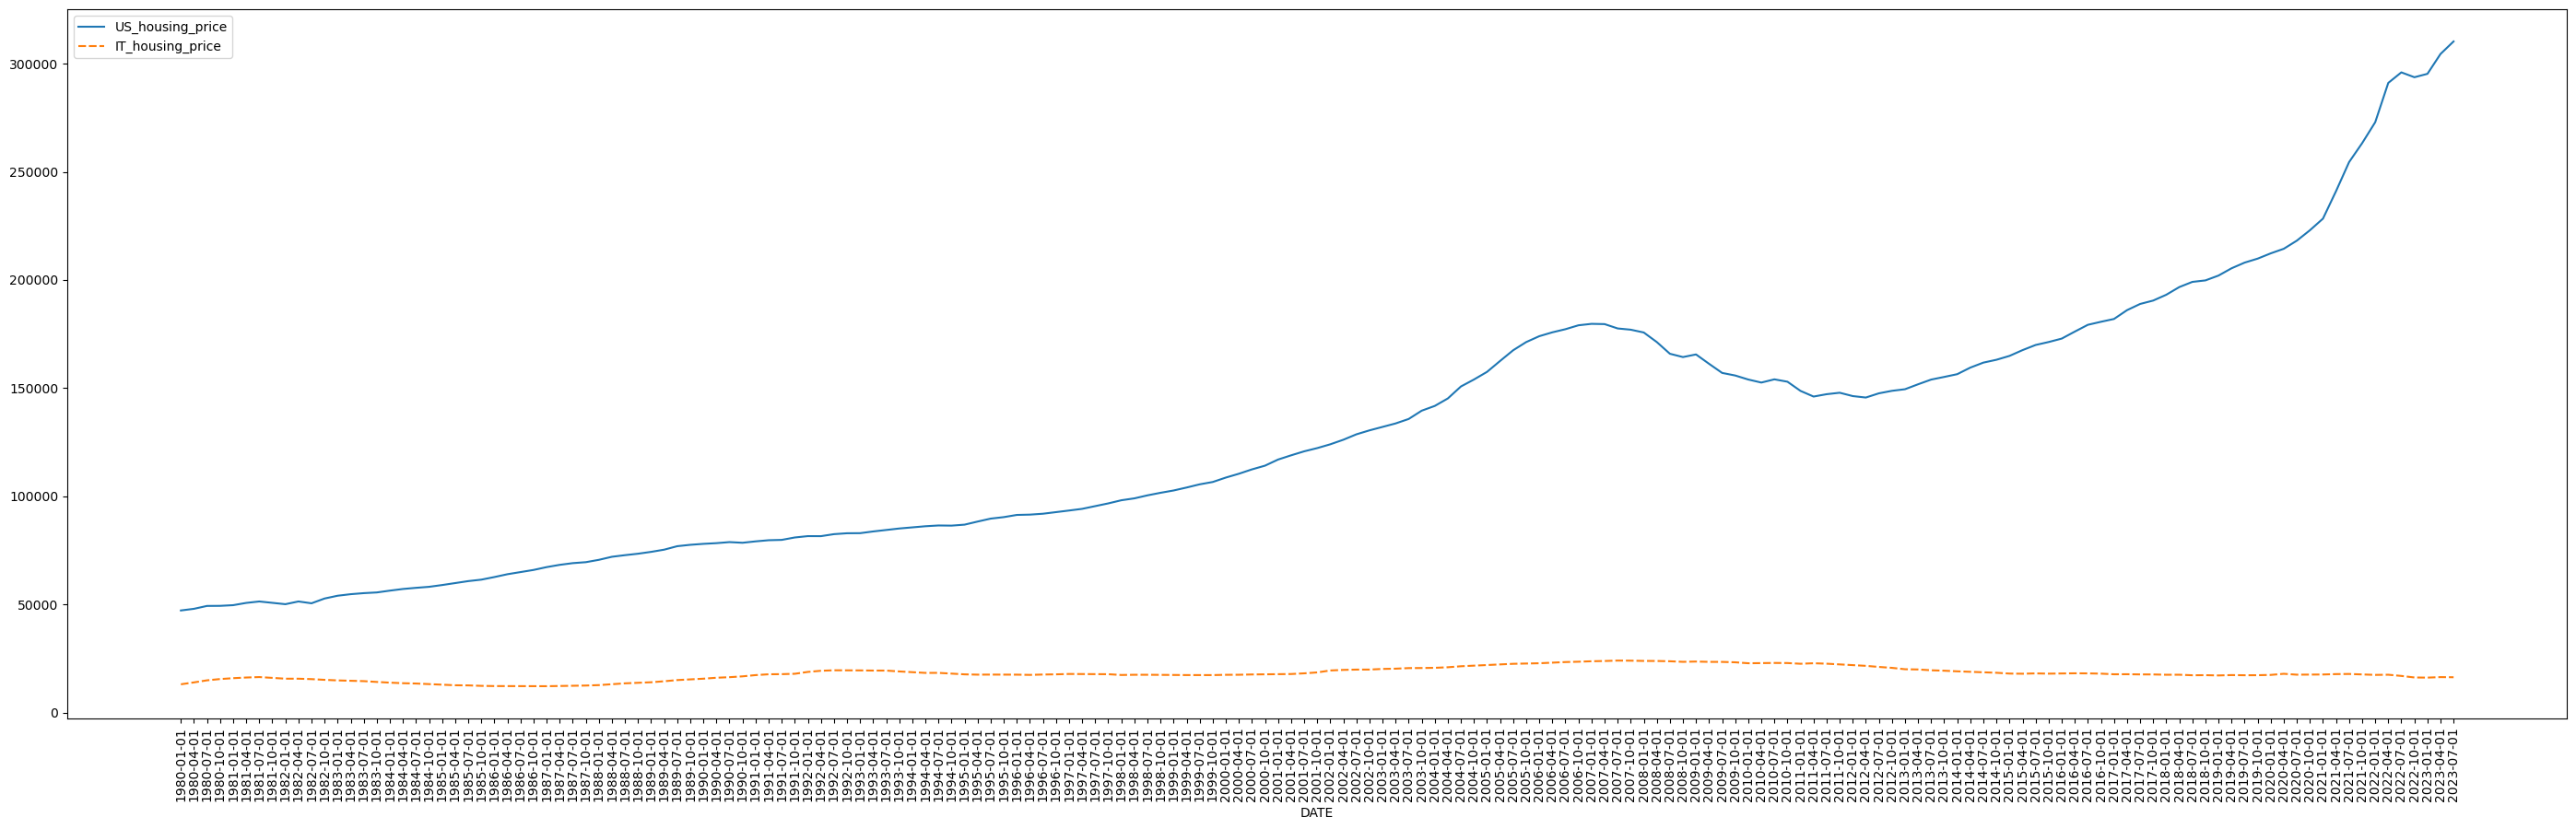

In [536]:
plt.figure(figsize=(35, 10))
plt.xticks(rotation=90)
sns.lineplot(housing_data)